# Coding Project - Watermark

Write code to automatically add a watermark to a photograph.

<img src='./ex_wm.jpg' width="500px" />

## Main requirements

The minimum requirements are to:
* Add the white pixels from the watermark somewhere in the photograph.
* Save the resulting image as an image file & display it in the notebook

You may use the *watermark.png* file available in the GitHub repository, or choose/create your own.

## Additional requirements

For extra points, you may add some possible improvements (note: this is not an exhaustive list, use your imagination!)

* Add an option to choose the watermark location
* Add transparency effect to the watermark
* Determine if the watermark should be dark or light based on the luminosity of the image
* ...


# Report
To complete the main requirements, a combined_diff_types_images() function is defined, it takes at first 2 image inputs. 
    In order to combine those 2 images, the function sees which one is the bigger in term of height and width, from that determination, it computes the new combined image. Note that the assumption that the biggest image corresponds to the one whose shape is equal to 3 and the other one's shape is equal to 2 ('watermark.png' for example), is taken.
  Then, a new array with the bigger image's sizes and with a value 4 for the third index, is created, filled with zeros. This new array "new_im" will contain the values of "im1" (to ease the length of the explanation, "im1" is assumed to be the biggest image input) and the alpha channel of the third index will be set by default to 255. 

Therefore, the combined_diff_types_images() function has 4 others arguments, they are used for the additional requirements that will be explained right below. The last 3 arguments are set by default if the user does not want to use the additional effects.

The first additional requirement has been implemented. Indeed, in order to choose the watermark location, the third "coords" argument is implemented, it allows to put the watermark at the wanted coordinates.  
  Then, the fourth argument of the function is used to control the opacity (when the "transparency" argument is on its default value cfr. below) of the watermark color by using the value of the alpha channel in RGBA (third index in an array's shape).  
  In order to add transparency effect to the watermark, the fifth argument is implemented. It is an optional effect that the user can choose to use or not, thus it is set by default to 'disable'. Whenever the "transparency" argument is set to 'enable', the watermark's alpha channel will be set to the value 120. It gives an effect of transparency.
      
   Finally, the last argument allows, if it is set to 'yes', to detect the mean brightness of the image that we add the watermark to, and to determine whether it should be dark or light. In order to detect the brightness of the image, an other function is defined. Indeed, the detect_brightness() function will take as argument the image that is processed, this image will be converted to HSV and if its mean value of the value of HSV (third index of the image's shape) is equal or greater than 0.5 (arbitrary value to delimit the brightness), the returned variable "color" will be set to 0, but if the mean value is smaller than 0.5, the return value will be 255. This last value is used in the combined_diff_types_images() function.
### Ideas to implement : - Effet shuffle sur le ULB

In [1]:
###Definition of functions###

from skimage.color import rgb2hsv
import numpy as np

def detect_brightness(image) :
    imshv = rgb2hsv(image)
    meanBrightness = np.mean(imshv[:,:,2])
    if(meanBrightness >= 0.5) :
        color = 0
    else :
        color = 255
    
    return color
    
    
def combined_diff_types_images(im1, im2, coords, opacity = 255, transparency = 'disable', y_n = 'no') : #assume that bigger image is jpg 
    height1 = im1.shape[0]                                                                              #and smaller image is png
    height2 = im2.shape[0]
    width1  = im1.shape[1]
    width2  = im2.shape[1]
    len1    = len(im1.shape)
    len2    = len(im2.shape)
    color   = 255
    
    if(height1 < height2 and width1 < width2) :
        if(len1 < len2) :
            new_im = np.zeros((height2, width2, 4), np.uint8)
            new_im[:,:,0:3] = im2[:,:,0:3]
            new_im[:,:,3]   = 255         #Ensure the visibility of the image (default value is 0, i.e. totally transparent)
            
            if(y_n == 'yes') :
                color = detect_brightness(im2)
                
            for y in range(height1) :
                for x in range(width1) :
                    if(im1[y,x] == 255) :
                        if(transparency == 'disable') :
                            new_im[y+coords[0],x+coords[1],0:3] = color         
                            new_im[y+coords[0],x+coords[1],3]   = opacity   
                        elif(transparency == 'enable') :
                            new_im[y+coords[0],x+coords[1],0:3] = im2[y+coords[0],x+coords[1],0:3]
                            new_im[y+coords[0],x+coords[1],3] = 120
    
    
    elif(height2 < height1 and width2 < width1) :
        if(len2 < len1) :
            new_im = np.zeros((height1, width1, 4), np.uint8)
            new_im[:,:,0:3] = im1[:,:,0:3]
            new_im[:,:,3]   = 255       
            
            if(y_n == 'yes') :
                color = detect_brightness(im1)
                
            for y in range(height2) :
                for x in range(width2) :
                    if(im2[y,x] == 255) :
                        if(transparency == 'disable') :
                            new_im[y+coords[0],x+coords[1],0:3] = color         
                            new_im[y+coords[0],x+coords[1],3]   = opacity   
                        elif(transparency == 'enable') :
                            new_im[y+coords[0],x+coords[1],0:3] = im1[y+coords[0],x+coords[1],0:3]
                            new_im[y+coords[0],x+coords[1],3] = 120
          
        
    return new_im                   


## Adding white pixels at a given coordinate in the photograph

<IPython.core.display.Javascript object>


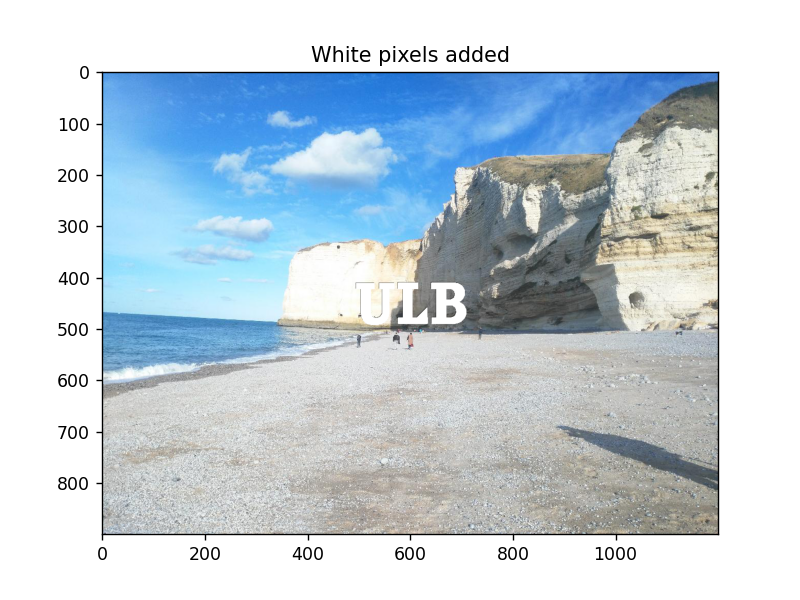

In [2]:
###Main###

from skimage.io import imread,imsave,imshow
%matplotlib notebook 
from matplotlib import pyplot as plt


watermark = imread('watermark.png') 
ex = imread('ex_wm.jpg')            

coords = (409, 492)  #almost exactly at the ULB mark
opacity = 255

new_im = combined_diff_types_images(watermark, ex, coords)
imsave('new_ex_wm.png', new_im)  #JPEG DOES NOT SUPPORT ALPHA CHANNEL

plt.figure()
plt.title("White pixels added")
plt.imshow(new_im)
plt.show()

## Adding pixels based on the luminosity of the image

Here the pixels of the watermark will be black because the brightness of the photograph is higher than the arbitrary value 0.5.
There are 3 watermarks added with different values of opacity. 

<IPython.core.display.Javascript object>


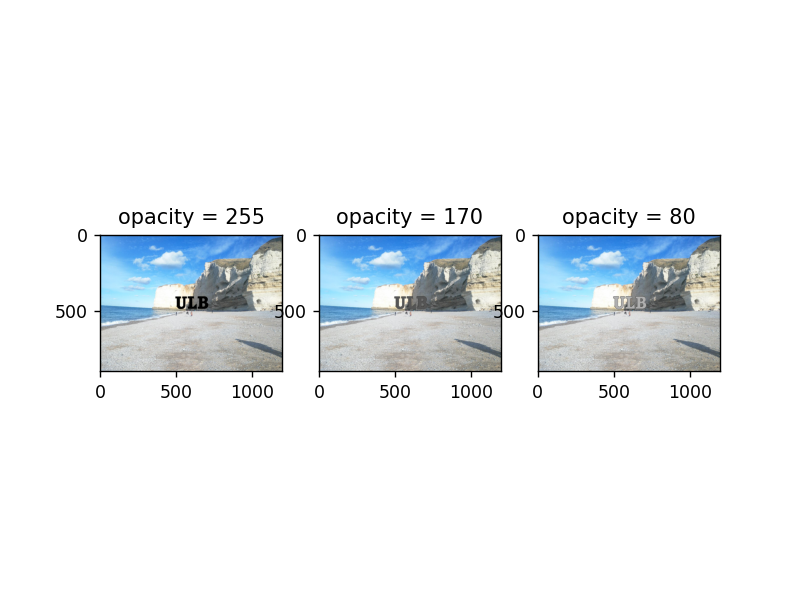

In [3]:
watermark = imread('watermark.png') 
ex = imread('ex_wm.jpg')            

coords = (409, 492)  #almost exactly at the ULB mark
opacity = 255
opacity2 = 170
opacity3 = 80

new_im2 = combined_diff_types_images(watermark, ex, coords, opacity, 'disable', 'yes')
new_im3 = combined_diff_types_images(watermark, ex, coords, opacity2, 'disable', 'yes')
new_im4 = combined_diff_types_images(watermark, ex, coords, opacity3, 'disable', 'yes')
imsave('new_ex_wm2.png', new_im2)
imsave('new_ex_wm3.png', new_im3)
imsave('new_ex_wm4.png', new_im4)

plt.figure()
plt.title("Pixels added based on the brightness of the image")
plt.subplot(1,3,1)
plt.title("opacity = 255")
plt.imshow(new_im2)
plt.subplot(1,3,2)
plt.title("opacity = 170")
plt.imshow(new_im3)
plt.subplot(1,3,3)
plt.title("opacity = 80")
plt.imshow(new_im4)
plt.show()

## Adding pixels based on the luminosity of the image

Here the pixels of the watermark will be white because the brightness of the photograph is lower than the arbitrary value 0.5.
3 different values of opacity are put in parameter but we can see in the displays below that visually there is no differences.
It is because the alpha channel does not change visually with the color white.
So here only the first image will be saved.

<IPython.core.display.Javascript object>


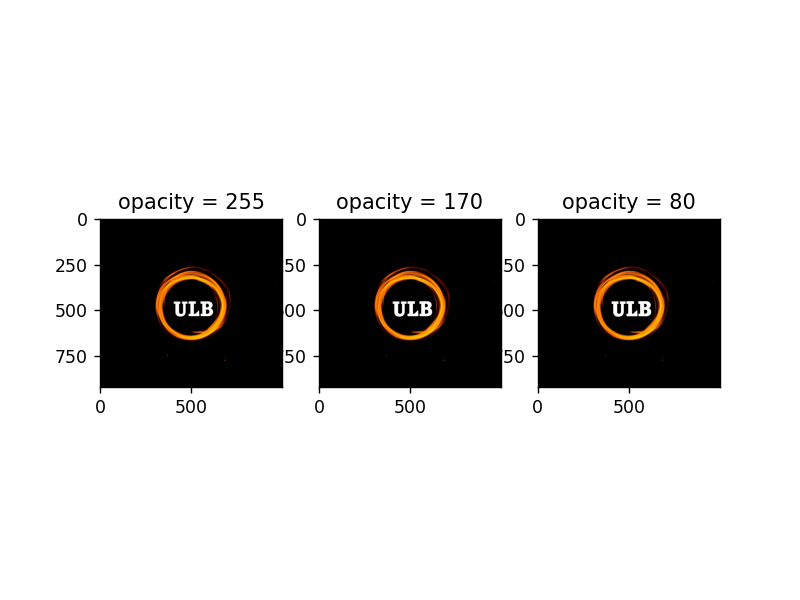

In [4]:
watermark = imread('watermark.png') 
dark_im = imread('dark.jpg')

coords = (450, 400)  #almost exactly at the ULB mark
opacity = 255
opacity2 = 170
opacity3 = 80

new_im5 = combined_diff_types_images(watermark, dark_im, coords, opacity, 'disable', 'yes')
new_im6 = combined_diff_types_images(watermark, dark_im, coords, opacity2, 'disable', 'yes')
new_im7 = combined_diff_types_images(watermark, dark_im, coords, opacity3, 'disable', 'yes')
imsave('new_ex_wm5.png', new_im5)  

plt.figure()
plt.title("Pixels added based on the brightness of the image")
plt.subplot(1,3,1)
plt.title("opacity = 255")
plt.imshow(new_im5)
plt.subplot(1,3,2)
plt.title("opacity = 170")
plt.imshow(new_im6)
plt.subplot(1,3,3)
plt.title("opacity = 80")
plt.imshow(new_im7)
plt.show()

## Adding transparency effect to the pixels of the watermark

When the transparency effect is enable, the opacity value is not taken into account.
2 images are displayed below to show the transparency effect.

<IPython.core.display.Javascript object>


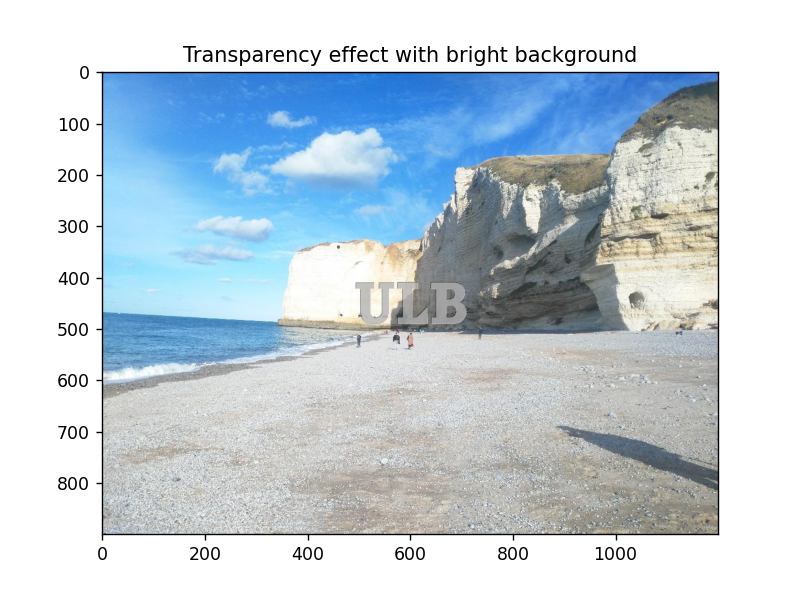

<IPython.core.display.Javascript object>


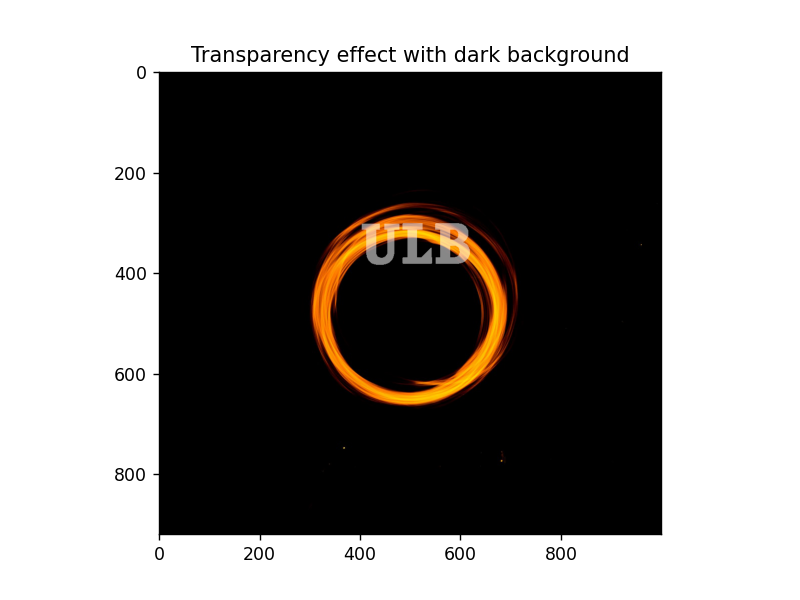

In [5]:
watermark = imread('watermark.png')
ex = imread('ex_wm.jpg')           
dark_im = imread('dark.jpg')

coords = (409, 492)  #almost exactly at the ULB mark
coords2 = (300, 400)
opacity = 255

new_im8 = combined_diff_types_images(watermark, ex, coords, opacity, 'enable')
new_im9 = combined_diff_types_images(watermark, dark_im, coords2, opacity, 'enable')
imsave("new_ex_wm8.png", new_im8)
imsave("new_ex_wm9.png", new_im9)

plt.figure()
plt.title("Transparency effect with bright background")
plt.imshow(new_im8)
plt.figure()
plt.title("Transparency effect with dark background")
plt.imshow(new_im9)
plt.show()